# I Perkenalan

=================================================

Nama  : Gieorgie Kharismatik Kosasih


=================================================

## Problems

Membuat model regression menggunakan Linear Regression untuk memprediksi harga perjalanan pada Uber dan lyft di New york.

## Latar Belakang
Data yang digunakan merupakan data pemesanan Uber dan Lyft di New York selama bulan November dan Desember tahun 2013. Data ini juga mencakup informasi cuaca pada saat pelanggan melakukan pemesanan. Data tersebut dapat diakses di [sini](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma).


## Objective
Objective dari proyek ini adalah untuk memahami konsep regresi dengan Linear Regression, mempersiapkan data untuk digunakan dalam model Linear Regression, dan mengimplementasikan Linear Regression untuk membuat prediksi. Proyek ini mencakup pemahaman teori dasar Linear Regression, pengumpulan dan pembersihan data, eksplorasi dan analisis awal data, serta melakukan feature engineering untuk meningkatkan kinerja model. Selain itu, proyek ini bertujuan untuk membangun, melatih, dan menguji model, serta menilai akurasi dan kinerjanya. Hasil dari model akan diinterpretasikan secara menyeluruh.

# II Import Libraries

In [81]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistic
from scipy.stats import spearmanr,kendalltau

# Data Spliting
from sklearn.model_selection import train_test_split

# Model Machine Learning
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

# Scalling
from sklearn.preprocessing import RobustScaler

# Encoding
from sklearn.preprocessing import OneHotEncoder

# Metric Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Capping Data
from feature_engine.outliers import Winsorizer

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Save Model
import pickle
import json


# III Data Loading

In [82]:
# Load Data
df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [83]:
# Menampilkan jumlah baris dan kolom
print(f'Jumlah baris : {df.shape[0]}')
print(f'Jumlah kolom : {df.shape[1]}')

Jumlah baris : 693071
Jumlah kolom : 57


Data tergolong dalam data yang besar dengan jumlah kolom yang banyak

In [84]:
# Menampilkan info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [85]:
# Deskripsi awal dari data
display(df.describe().T, df.describe(include='object').T)


,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


,count,unique,top,freq
id,693071,693071,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1
datetime,693071,31350,2018-11-26 23:21:14,156
timezone,693071,1,America/New_York,693071
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
product_id,693071,13,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,693071,13,UberXL,55096
short_summary,693071,9,Overcast,218895
long_summary,693071,11,Mostly cloudy throughout the day.,202340


Data berisikan informasi transaksi pemesanan layanan uber dan lyft selama 2 bulan yaitu pada bulan november dan desember.Data memiliki kolom numerikal sebanyak 46 dan kolom kategori sebanyak 11. Informasi dalam data terdapat informasi waktu, informasi perjalanan, informasi lokasi, dan informasi cuaca selama transaksi berlangsung. Untuk memahami data lebih lanjut akan dilakukan pada proses selanjutnya.

## Missing Value

In [86]:
# Menghitung missing value pada data
data_null = df.isna().sum().reset_index().rename(columns={'index':'variable',0:'null count'})
# Menghitung presentase missing value pada data
data_null['null percentage'] = data_null['null count'].apply(lambda x: (x/(df.shape[0]))*100)
data_null

,variable,null count,null percentage
0,id,0,0.000000
1,timestamp,0,0.000000
2,hour,0,0.000000
3,day,0,0.000000
4,month,0,0.000000
5,datetime,0,0.000000
6,timezone,0,0.000000
7,source,0,0.000000
8,destination,0,0.000000
9,cab_type,0,0.000000


Terdapat missing value pada data yaitu pada kolom price sebanyak 55095 dengan presentasi 7.9%.

In [87]:
# Menampilkan baris yang ada missing value
df[df['price'].isnull()]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,...,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,1.543795e+09,23,2,12,2018-12-02 23:52:56,America/New_York,Beacon Hill,South Station,Uber,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
40,7f47ff53-7cf2-4a6a-8049-83c90e042593,1.543524e+09,20,29,11,2018-11-29 20:38:05,America/New_York,North Station,Fenway,Uber,...,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
60,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,1.544732e+09,20,13,12,2018-12-13 20:10:16,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
69,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,1.543583e+09,13,30,11,2018-11-30 13:08:03,America/New_York,North End,Beacon Hill,Uber,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693025,70ad9983-92dd-4cdf-af16-732e7e9ee9d0,1.544887e+09,15,15,12,2018-12-15 15:15:13,America/New_York,South Station,Beacon Hill,Uber,...,0.0081,1544893200,39.68,1544929200,54.46,1544896800,36.43,1544929200,53.79,1544896800
693047,84e05ef0-781a-4bd5-a593-bbbf659d4ba0,1.543456e+09,1,29,11,2018-11-29 01:47:08,America/New_York,Haymarket Square,Beacon Hill,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
693049,885ef635-299e-45cf-8052-c45a39e9822a,1.543456e+09,1,29,11,2018-11-29 01:47:08,America/New_York,North End,Beacon Hill,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
693060,50a7b6be-ed2a-4a11-8d36-73bd977ad66a,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000


Missing value didalam data terdapat pada price dengan tipe uber taxi. missing value ini merupakan tipe missing value MCAR(Missing Completely at Random) 

In [88]:
# menampilkan missing value
missing_values_per_name = df.groupby(['name','cab_type'])['price'].apply(lambda x: x.isnull().sum())
print(missing_values_per_name)

name          cab_type
Black         Uber        0    
Black SUV     Uber        0    
Lux           Lyft        0    
Lux Black     Lyft        0    
Lux Black XL  Lyft        0    
Lyft          Lyft        0    
Lyft XL       Lyft        0    
Shared        Lyft        0    
Taxi          Uber        55095
UberPool      Uber        0    
UberX         Uber        0    
UberXL        Uber        0    
WAV           Uber        0    
Name: price, dtype: int64


Terdapat missing value pada data yang nantinya akan di terutama pada kolom pada app uber dengan tipe taxi. missing value pada data berada dalam target maka missing value akan ditangani dengan langsung drop missing value karena penganganan dengan input tidak memungkinkan mengingat kolom ini adalah target dari model.

In [89]:
# drop missing value
df = df.dropna()
df.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [90]:
# cek duplikasi dalam data
print('Jumlah data duplikat:', df.duplicated().sum())

Jumlah data duplikat: 0


tidak ditemukan adanya duplikasi pada data.

# IV Exploratory Data Analysis (EDA)

Pada tahapan ini akan dilakukan explorasi pada dataset dimana explorasi akan berfokus pada seleksi kolom yang akan menjadi calon feature untuk mendukung proses feature selection mengingat kolom dataset memiliki banyak kolom. hal yang dilakukan meliputi melihat distribusi data, mencari variable independent dan dependent.

## Price Distribution

Target utama dalam project ini adalah price, maka mari kita lihat distribusi serta central tendency pada kolom ini 

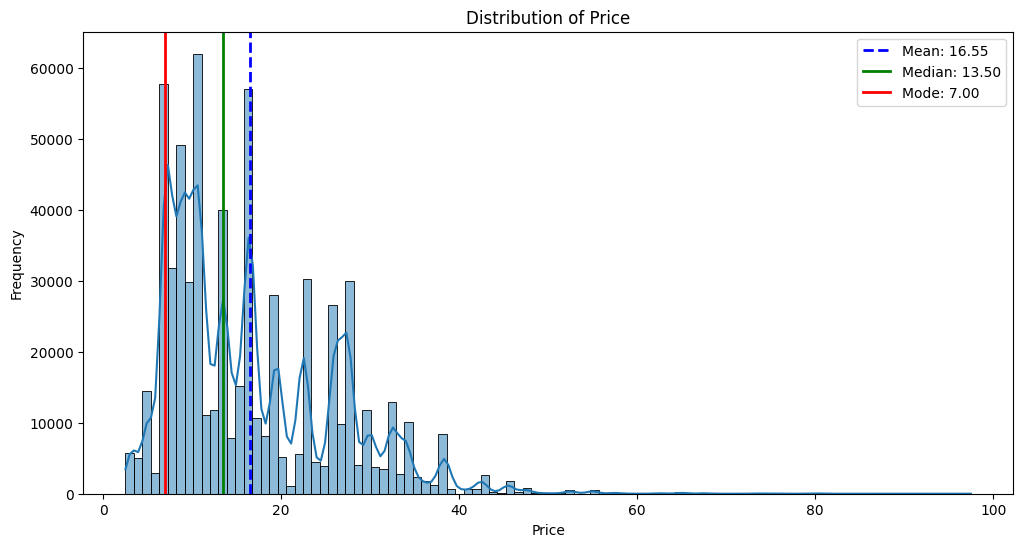

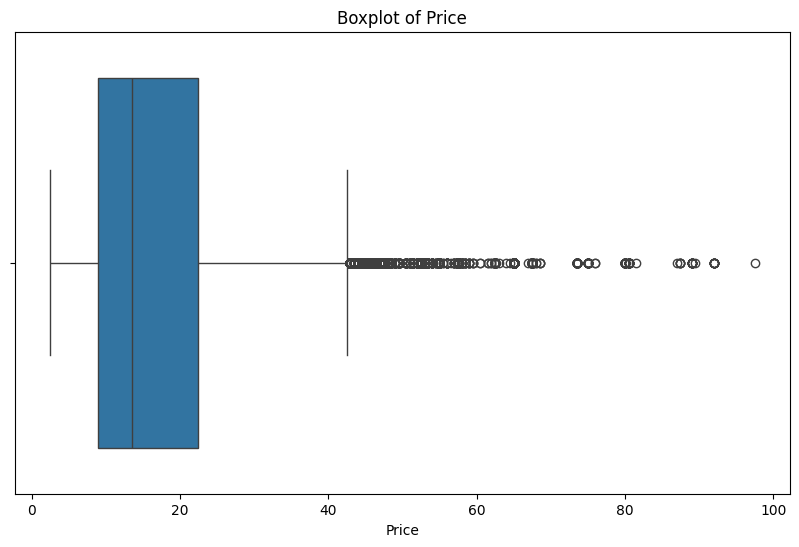

Mean: 16.55
Median: 13.50
Mode: 7.00
Skewness: 1.05


In [91]:
# Hitung mean, median, modus, dan skewness
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]
skewness_price = df['price'].skew()

# Plot distribusi harga
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=100, kde=True)
plt.axvline(mean_price, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='-', linewidth=2, label=f'Median: {median_price:.2f}')
plt.axvline(mode_price, color='red', linestyle='-', linewidth=2, label=f'Mode: {mode_price:.2f}')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot boxplot harga
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

# Tampilkan mean, median, modus, dan skewness
print(f'Mean: {mean_price:.2f}')
print(f'Median: {median_price:.2f}')
print(f'Mode: {mode_price:.2f}')
print(f'Skewness: {skewness_price:.2f}')

Distribusi harga yang condong ke kanan menunjukkan bahwa sebagian besar perjalanan memiliki harga yang lebih rendah dari rata-rata, tetapi ada beberapa perjalanan dengan harga yang sangat tinggi yang meningkatkan rata-rata. Hal ini bisa disebabkan oleh perjalanan pada jam sibuk atau ke daerah yang lebih jauh. Perbedaan antara mean dan median menunjukkan adanya outliers atau nilai ekstrem dalam data, yang mungkin muncul karena surge pricing atau perjalanan jarak jauh. Dengan mode di $7.00, banyak perjalanan yang dilakukan di kisaran harga ini, menunjukkan banyaknya perjalanan pendek.

## Trip by Time

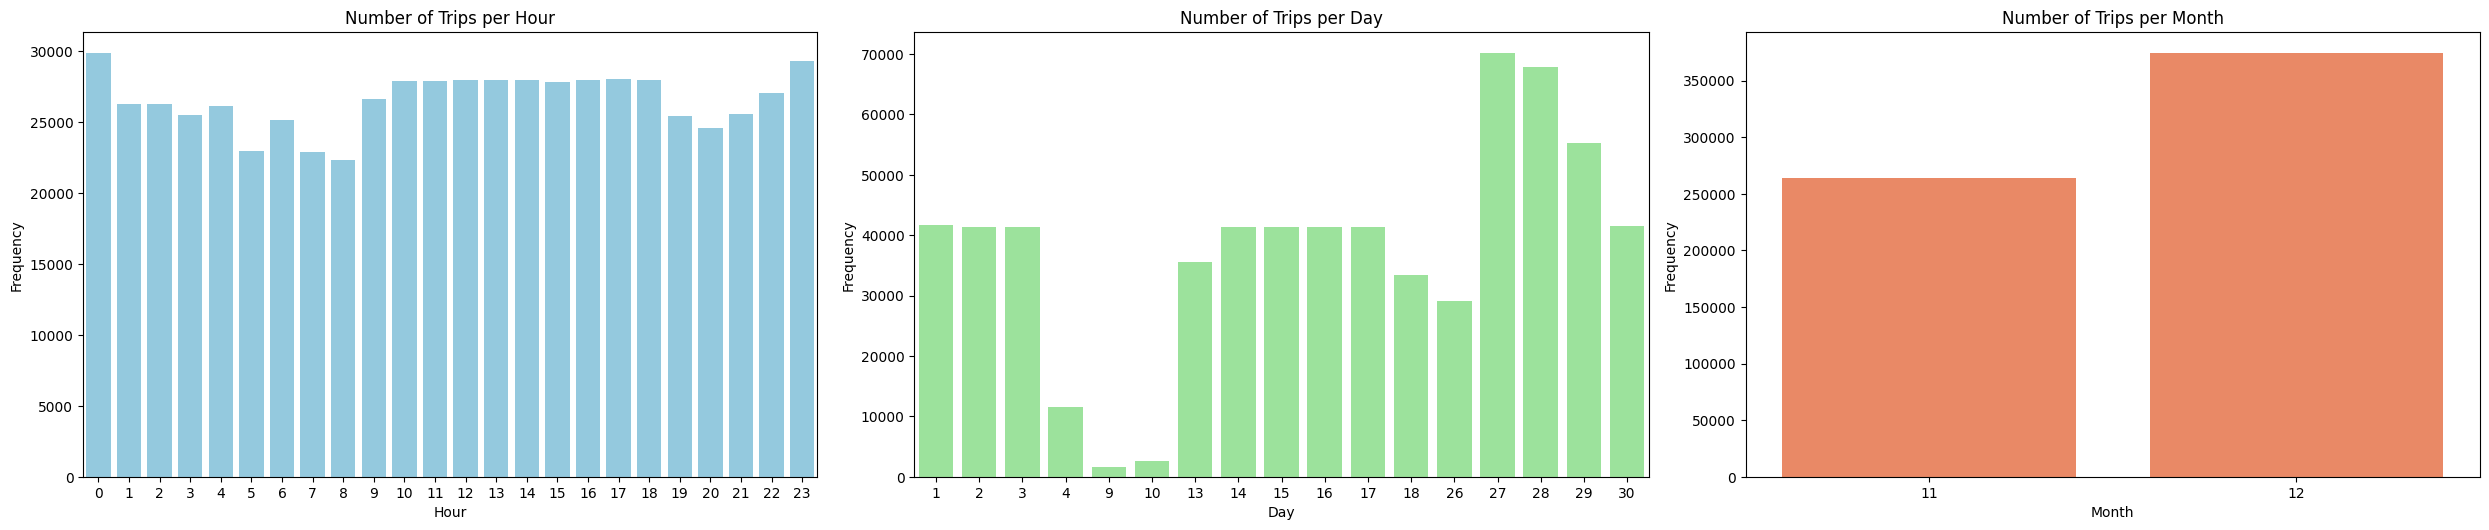

In [92]:
plt.figure(figsize=(25, 10))

# Plot jumlah perjalanan per jam
plt.subplot(2, 3, 1)
sns.countplot(x='hour', data=df, color='skyblue')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')

# Plot jumlah perjalanan per hari
plt.subplot(2, 3, 2)
sns.countplot(x='day', data=df, color='lightgreen')
plt.title('Number of Trips per Day')
plt.xlabel('Day')
plt.ylabel('Frequency')

# Plot jumlah perjalanan per bulan
plt.subplot(2, 3, 3)
sns.countplot(x='month', data=df, color='coral')
plt.title('Number of Trips per Month')
plt.xlabel('Month')
plt.ylabel('Frequency')

plt.tight_layout()  # Menyesuaikan tata letak subplot agar tidak tumpang tindih
plt.show()


Data menunjukkan bahwa transaksi pemesanan Uber dan Lyft di New York selama dua bulan memiliki pola tertentu: pemesanan paling ramai terjadi antara pukul 23:00 hingga 01:00, sementara jam paling sepi adalah antara pukul 05:00 hingga 08:00 karena penduduk New York pada umumnya belum memulai aktivitas mereka. Selain itu, jumlah pemesanan paling sedikit tercatat pada tanggal 9 dan 10 setiap bulan. Analisis ini mengindikasikan adanya pola penggunaan layanan ridesharing yang signifikan berdasarkan waktu dan tanggal.

## Cab Type

Text(0, 0.5, 'Frequency')

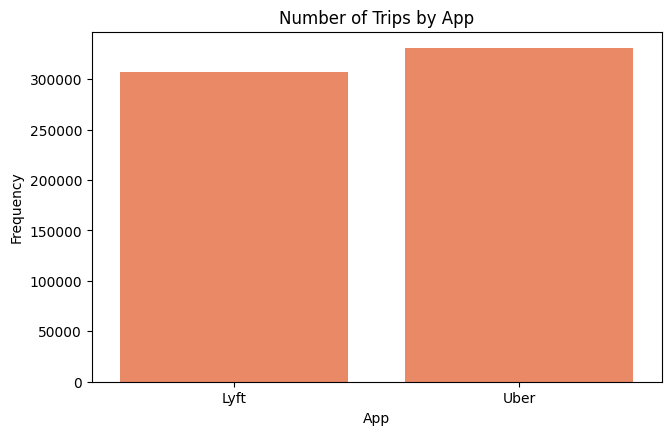

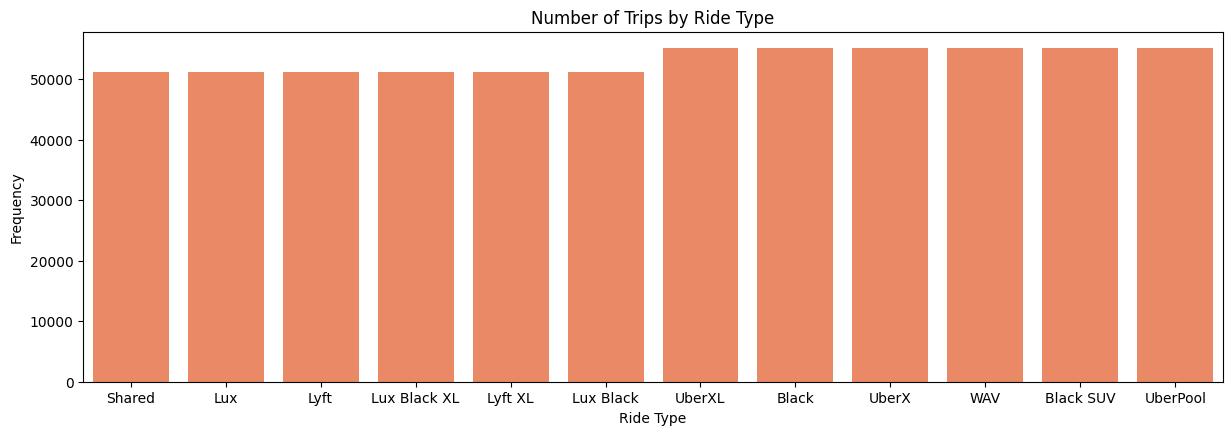

In [93]:
#Plot jumlah pemesanan Uber dan lyft
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 3)
sns.countplot(x='cab_type', data=df, color='coral')
plt.title('Number of Trips by App')
plt.xlabel('App')
plt.ylabel('Frequency')

#Plot jumlah pemesanan tipe layanan
plt.figure(figsize=(50, 10))
plt.subplot(2, 3, 3)
sns.countplot(x='name', data=df, color='coral')
plt.title('Number of Trips by Ride Type')
plt.xlabel('Ride Type')
plt.ylabel('Frequency')

Grafik menunjukkan jumlah perjalanan yang dilakukan menggunakan aplikasi Uber dan Lyft selama dua bulan. Grafik pertama memperlihatkan bahwa jumlah perjalanan yang dilakukan melalui Uber dan Lyft hampir sama, dengan sedikit keunggulan untuk Uber. Grafik kedua menunjukkan distribusi jumlah perjalanan berdasarkan jenis layanan yang ditawarkan oleh kedua aplikasi. Tipe perjalanan seperti 'UberX', 'Lyft', dan 'UberPool' merupakan yang paling sering digunakan, sementara layanan premium seperti 'Lux', 'Black', dan 'Black SUV' juga memiliki jumlah penggunaan yang signifikan namun sedikit lebih rendah dibandingkan dengan layanan reguler. Insight ini mengindikasikan bahwa meskipun layanan premium cukup populer, mayoritas pengguna lebih memilih layanan reguler atau layanan berbagi seperti 'UberPool' dan 'Shared'.

## Weather

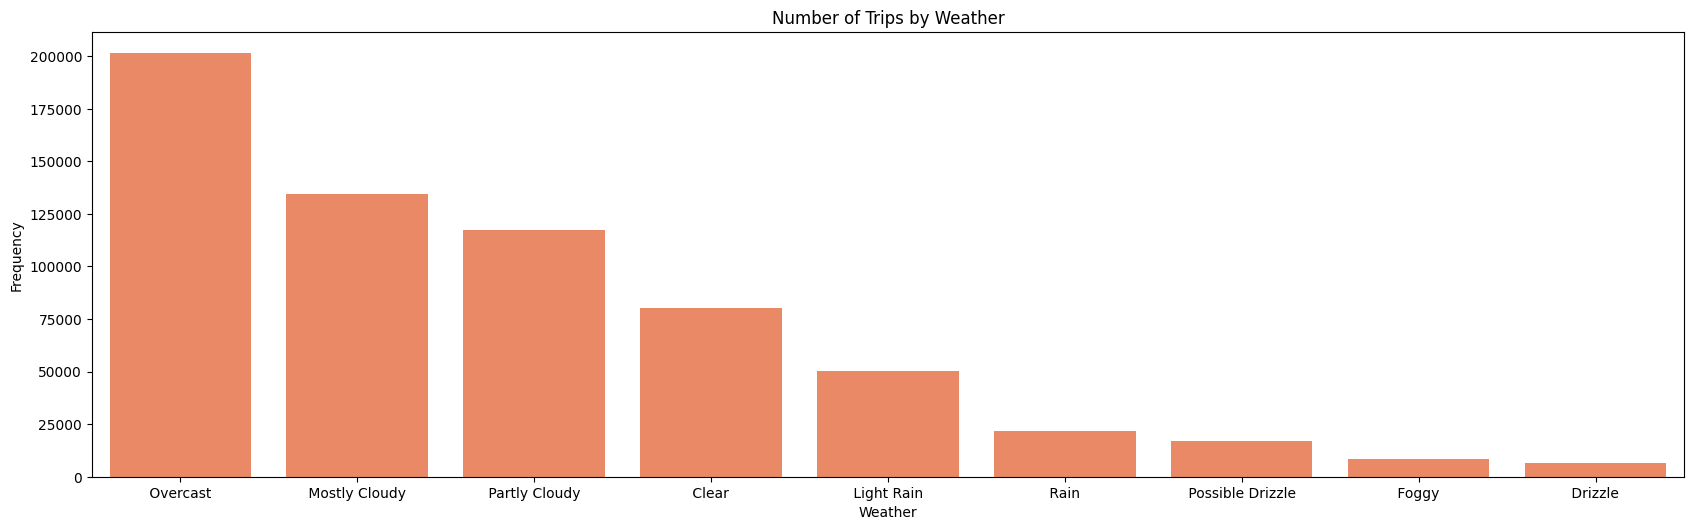

In [94]:
# Menghitung frekuensi setiap kategori dalam 'short_summary'
order = df['short_summary'].value_counts().index

plt.figure(figsize=(50, 10))
plt.subplot(2, 3, 3)
sns.countplot(x='short_summary', data=df, color='coral', order=order)
plt.title('Number of Trips by Weather')
plt.xlabel('Weather')
plt.ylabel('Frequency')

plt.tight_layout()  # Menyesuaikan tata letak subplot agar tidak tumpang tindih
plt.show()

Grafik menunjukkan jumlah perjalanan yang dilakukan berdasarkan kondisi cuaca selama dua bulan. Perjalanan terbanyak terjadi pada cuaca mendung (overcast), disusul oleh cuaca sebagian besar berawan (mostly cloudy) dan sebagian berawan (partly cloudy). Cuaca cerah (clear) juga memiliki jumlah perjalanan yang signifikan, namun lebih sedikit dibandingkan dengan kondisi berawan. Kondisi cuaca seperti hujan ringan (light rain), hujan (rain), kemungkinan gerimis (possible drizzle), berkabut (foggy), dan gerimis (drizzle) menunjukkan jumlah perjalanan yang lebih rendah. Insight ini mengindikasikan bahwa perjalanan lebih sering dilakukan pada kondisi cuaca mendung dan berawan, sementara cuaca buruk seperti hujan dan gerimis cenderung mengurangi jumlah perjalanan.

## Source and Destination

Text(0, 0.5, 'Frequency')

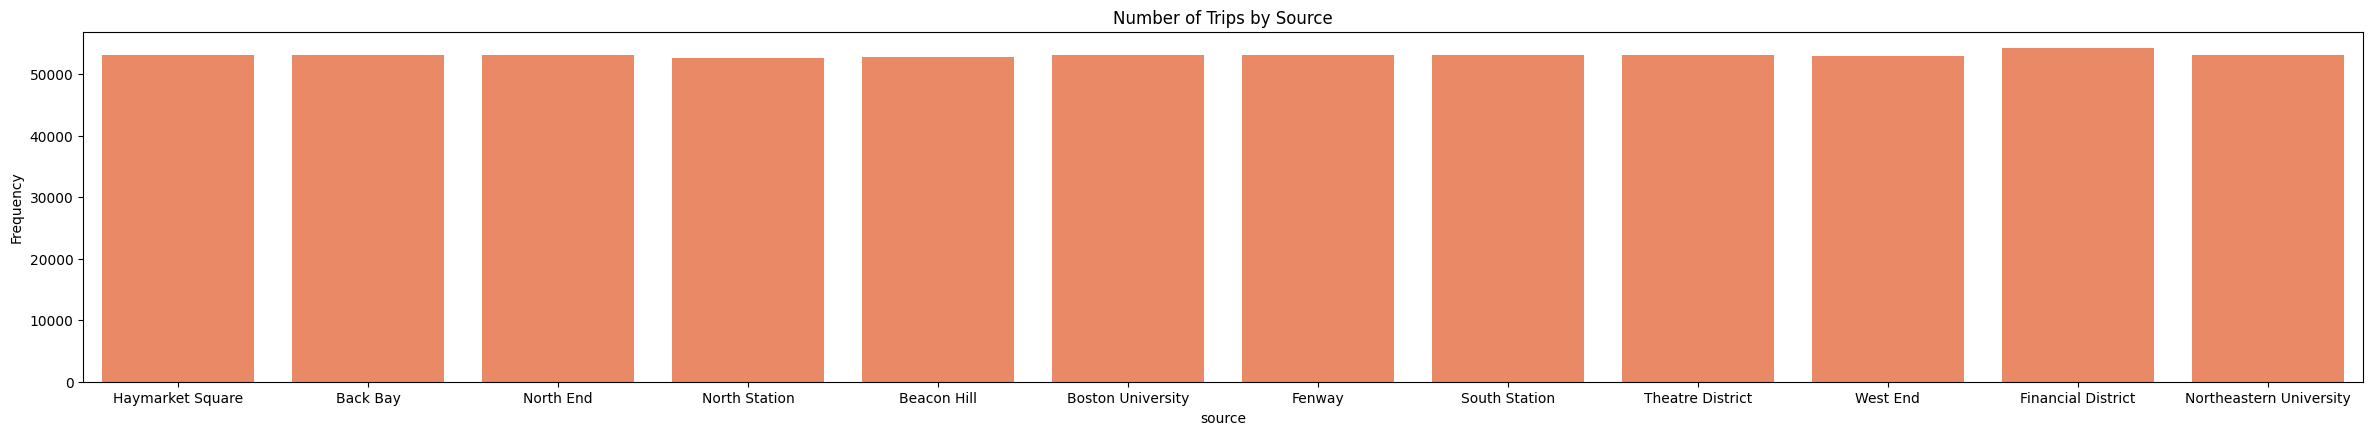

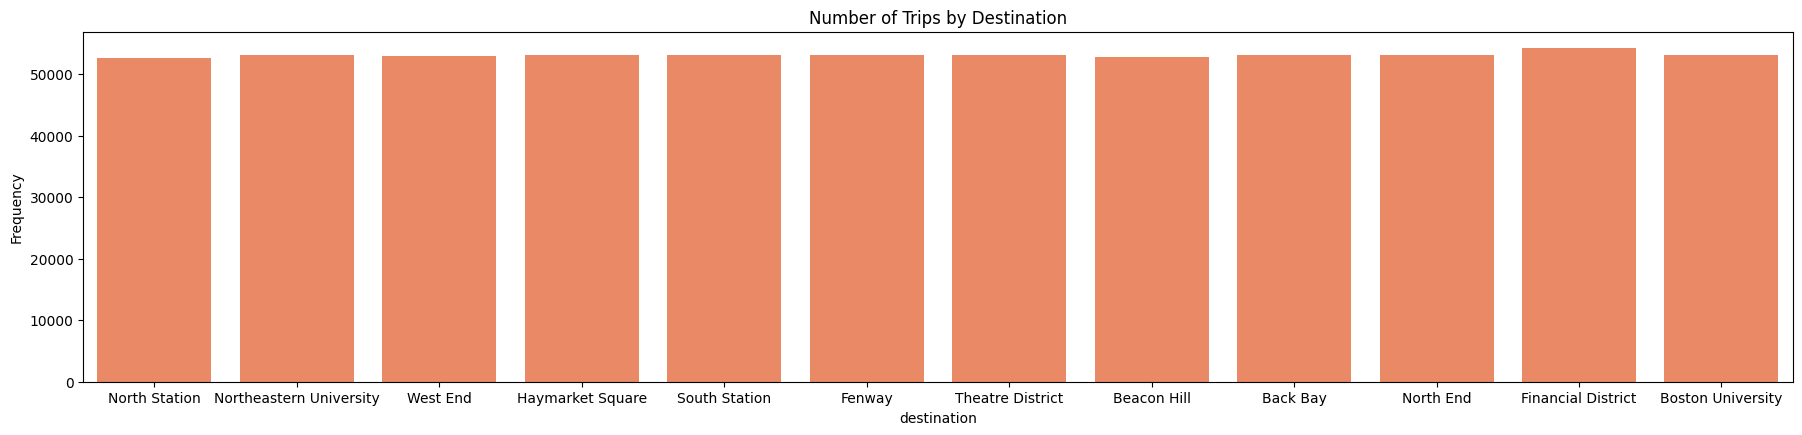

In [95]:
#Plot Jumlah pemesanan berdasarkan asal perjalanan
plt.figure(figsize=(100, 10))
plt.subplot(2, 3, 3)
sns.countplot(x='source', data=df, color='coral')
plt.title('Number of Trips by Source')
plt.xlabel('source')
plt.ylabel('Frequency')

#Plot jumlah pemesanan berdasarkan tujuan perjalanan
plt.figure(figsize=(75, 10))
plt.subplot(2, 3, 3)
sns.countplot(x='destination', data=df, color='coral')
plt.title('Number of Trips by Destination')
plt.xlabel('destination')
plt.ylabel('Frequency')

Grafik menunjukkan distribusi jumlah perjalanan berdasarkan sumber dan tujuan selama dua bulan. Grafik pertama memperlihatkan bahwa lokasi-lokasi seperti Haymarket Square, Back Bay, North End, dan North Station menjadi sumber perjalanan terbanyak, dengan setiap lokasi menunjukkan jumlah perjalanan yang hampir sama. Grafik kedua menunjukkan bahwa tujuan perjalanan juga tersebar merata, dengan lokasi-lokasi seperti North Station, Northeastern University, West End, dan Haymarket Square sebagai tujuan paling populer.

## Mencari korelasi antar kolom numerikal dengan kolom price

In [96]:
# Selecting numerical and categorical columns
num_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print('Categorical Columns: ', cat_columns)
print('Numerical Columns: ', num_columns)

Categorical Columns:  ['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']
Numerical Columns:  ['timestamp', 'hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']


Dikarenakan kolom numerical sangat banyak maka explorasi ini dibuat untuk dapat menjadi analisa dasar untuk memilih mana kolom numerical yang berkorelasi kuat dengan kolom price dan mana yang tidak. Berdasarkan explorasi pada distribusi kolom price sebelumnya, kolom price tidak terdistribusi normal maka korelasi antar kolom numerikal dan kolom price akan menggunakan metode spearman.

In [97]:
# membagi kolom categorical dan numerical
df_num = df[num_columns]
df_cat = df[cat_columns]

In [98]:
# Inisialisasi list untuk menyimpan hasil
p_values = []
interpretation = []
cols = []
corr = []
selected_num_cols = []

# Loop melalui setiap kolom numerik dalam dataframe
for col in df_num.columns:
    # Hitung koefisien korelasi Spearman dan nilai p
    corr_coef, p_value = spearmanr(df_num[col], df['price'])

    # Simpan hasil perhitungan ke dalam list yang sesuai
    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    # Tentukan apakah korelasi signifikan berdasarkan nilai p-value
    if p_value < 0.05:
        interpretation.append('Significant')
        selected_num_cols.append(col)  # Tambahkan kolom ke daftar kolom yang dipilih jika signifikan
    else:
        interpretation.append('Not Significant')

# Buat DataFrame untuk meringkas hasil
result_df = pd.DataFrame({
    'Column Name': cols,
    'Correlation Coefficient': corr,
    'P-value': p_values,
    'Correlation': interpretation
})

# Tampilkan DataFrame hasil
result_df


,Column Name,Correlation Coefficient,P-value,Correlation
0,timestamp,-0.000047,0.970224,Not Significant
1,hour,0.000552,0.659388,Not Significant
2,day,-0.001512,0.227139,Not Significant
3,month,0.000805,0.520325,Not Significant
4,price,1.000000,0.000000,Significant
5,distance,0.333871,0.000000,Significant
6,surge_multiplier,0.165611,0.000000,Significant
7,latitude,0.002037,0.103664,Not Significant
8,longitude,0.000144,0.908204,Not Significant
9,temperature,0.000282,0.821823,Not Significant


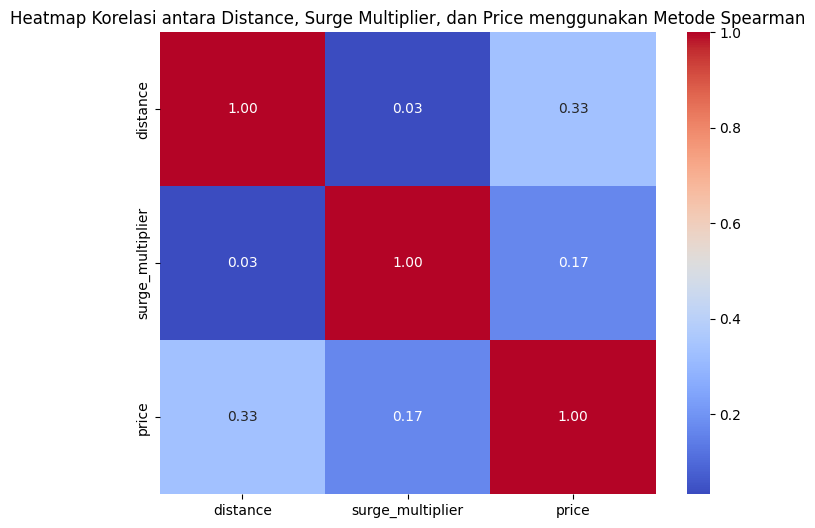

In [99]:
# Hitung matriks korelasi menggunakan metode Spearman
corr_matrix = df[['distance', 'surge_multiplier', 'price']].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antara Distance, Surge Multiplier, dan Price menggunakan Metode Spearman')
plt.show()

Berdasarkan hasil analisis korelasi menggunakan metode Spearman, ditemukan bahwa dua kolom memiliki korelasi yang signifikan terhadap harga (price) pada dataset. Kolom 'distance' menunjukkan korelasi positif yang cukup signifikan dengan harga, dengan koefisien korelasi sebesar 0.333871. Hal ini mengindikasikan bahwa semakin jauh jarak perjalanan, semakin tinggi harga yang harus dibayar oleh penumpang. Selain itu, kolom 'surge_multiplier' juga menunjukkan korelasi positif yang signifikan dengan harga, dengan koefisien korelasi sebesar 0.165611. Ini berarti bahwa ketika terjadi peningkatan harga (surge pricing), harga perjalanan cenderung lebih tinggi. Kedua korelasi ini signifikan secara statistik, yang diindikasikan oleh p-value yang sangat kecil, menunjukkan bahwa jarak perjalanan dan surge pricing adalah faktor utama yang mempengaruhi harga perjalanan dalam data.

###

In [100]:
#Finding the correlation between categorical columns and Y Train using Kendall Tau's correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_cat_cols = []

for col in df_cat.columns:
  corr_coef, p_value = kendalltau(df_cat[col], df['price'])

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretation.append('Significant')
    selected_cat_cols.append(col)
  else :
    interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,id,0.000314,7.112678e-01,Not Significant
1,datetime,-0.000031,9.707102e-01,Not Significant
2,timezone,NaN,NaN,Not Significant
3,source,-0.013056,2.352926e-49,Significant
4,destination,-0.031517,2.330818e-278,Significant
5,cab_type,-0.057004,0.000000e+00,Significant
6,product_id,0.050772,0.000000e+00,Significant
7,name,-0.397094,0.000000e+00,Significant
8,short_summary,0.000261,7.781422e-01,Not Significant
9,long_summary,0.000823,3.689918e-01,Not Significant


Berdasarkan analisis korelasi menggunakan metode Kendall's Tau, ditemukan beberapa kolom kategorikal yang memiliki korelasi signifikan terhadap harga (price) pada dataset. Kolom 'source' dan 'destination' menunjukkan korelasi negatif yang signifikan dengan harga, masing-masing dengan koefisien korelasi -0.013056 dan -0.031517, mengindikasikan bahwa lokasi asal dan tujuan perjalanan mempengaruhi harga. Kolom 'cab_type' juga menunjukkan korelasi negatif yang signifikan (-0.057004), menunjukkan bahwa jenis taksi mempengaruhi harga perjalanan. Kolom 'product_id' memiliki korelasi positif yang signifikan (0.050772), terkait dengan harga yang lebih tinggi. Terakhir, kolom 'name' menunjukkan korelasi negatif yang sangat signifikan (-0.397094), menunjukkan bahwa jenis layanan sangat mempengaruhi harga perjalanan.

## 

## Membuat data inference 

Data inference merupakan unseen data atau data yang tidak termasuk dalam test atau train. Sebelum melakukan spliting akan diambil beberapa data untuk dijadikan sebagai bahan uji model pada tahap model inference

In [101]:
#Cek total baris sebelum di ambil data
len(df)

637976

In [102]:
# Mengambil inference data pada dataframe
inference_data = df.sample(15, random_state=23)

df = df.drop(inference_data.index)

In [103]:
# Cek total baris sesudah pengambilan data
len(df)

637961

Data yang dipisahkan sudah benar benar tidak ada di dalam data frame maka data yang dipisahkan dapat menjadi data untuk model inference karena data tidak termasuk dalam test atau train data.

# V Feature Engineering

Pada tahapan ini akan dilakukan pembagian data menjadi data train dan test, handling missing value pada data, menentukan kolom yang akan menjadi fitur pada model, melakukan handling pada outlier dan mentransformasi data untuk siap digunakan pada model machine learning.

## Cardinality Handling

In [104]:
# Mendapatkan daftar kolom dengan tipe data objek
pd.set_option('display.max_colwidth', 1)
object_columns = df.select_dtypes(include=['object']).columns

listItem = []
for col in object_columns:
    listItem.append([col, df[col].nunique(), df[col].unique()])

# Membuat dataframe dari listItem
tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Value'], data=listItem)

tabel1Desc

,Column Name,Number of Unique,Unique Value
0,id,637961,"[424553bb-7174-41ea-aeb4-fe06d4f4b9d7, 4bd23055-6827-41c6-b23b-3c491f24e74d, 981a3613-77af-4620-a42a-0c0866077d1e, c2d88af2-d278-4bfd-a8d0-29ca77cc5512, e0126e1f-8ca9-4f2e-82b3-50505a09db9a, f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2, 462816a3-820d-408b-8549-0b39e82f65ac, 474d6376-bc59-4ec9-bf57-4e6d6faeb165, 4f9fee41-fde3-4767-bbf1-a00e108701fb, 8612d909-98b8-4454-a093-30bd48de0cb3, 9043bf77-1d45-4a93-9520-a083e0277f16, d859ec69-b3ff-4af8-9abd-441e31430c94, 009e9c53-074d-43cf-aef2-0fbc7a47ed3d, 23f145da-f0c1-4d1f-a184-496bc003a7db, 357559cb-8c58-4278-a41a-e33b2e0997a3, 50ef1165-9d23-416c-a65c-18906207b295, 91c4861c-1780-42b0-bca1-bbd64a422cc3, e219e545-a006-4936-a6cc-7d00adf0e418, 18d580ac-c91a-4b6d-aa75-ab62566f713e, 3ef5c509-f292-42ef-b39c-bce7059006a0, 5ef44fdf-c5d3-4d07-967a-a8710e537e74, a7c1afce-9781-41c9-b6a6-df109ad43ccd, d0782aae-4cfa-45df-b6e4-e300b09c2563, f4f03d2d-434b-41f3-935a-c29e3f2de8bd, 1d451059-895c-4179-8cec-40adfbc4f6d3, 1f64fcff-b01f-4b64-90f4-5c866d717317, 2ca4699c-21e1-4fb4-9cc2-1d6221199d08, 4149295f-4534-4712-b2cf-160308528c75, 80d2a972-2686-4edc-bc22-ddccdf211fde, 8674e79f-4c5b-4a2e-8327-a68997d5d740, 00dd58fc-fa9e-4eeb-bb6e-dfeb94611e85, 174b960d-58f1-4dfd-8672-8b43f13726a7, 1d34b421-4ee7-4ec5-bba5-265f43b91a4e, 72fb8672-a823-447e-ae15-fd51aef9db66, e61386a3-b205-49b4-b064-990b124ecfa2, 39f120bf-ddc0-4d27-8ab4-bb7d46ecf8e3, 4d36b792-8973-4dd2-aaf9-aacaac046bd5, 53bc8bc7-0b27-4648-9742-d7956d2a13a8, c05d4e09-3f00-43cf-a0d8-6f38c0f4d04a, c7d4bb19-3c35-46c7-ad3c-f00a03ccfdfe, d25c46f2-b8a3-454d-97d1-4e2c8e1dff68, 0c26c153-a58d-419d-b557-37cfad67585c, 104ced5c-1c1b-4021-94bb-b21af453399a, 1cf8a0a5-d871-41ba-91c7-53658851501e, 5e990c7a-8f5c-4583-812c-b6200dd018f6, bd1d5b1a-ed7f-4fc8-8fd1-9236a5de403e, c7a2284b-2f7b-49a8-8d5b-90e1ebe18a1f, 2e0059db-945e-4615-9f87-46b8966d62f2, 77667337-1484-497d-a0d2-2844126c2517, c03b25ba-1d74-4522-8f3b-feb4bebcb4c7, fa00bcf3-78f7-4b62-b133-c3190a85edab, 33d90ba7-60f5-4da1-afc3-39d4d038f7ec, 6c936f6d-c587-49ae-bb39-5aeb54eff756, 8b905a5a-c626-42a6-b23b-eae7c7b689a3, c8c093f0-960b-4668-b1f6-1e42dcf6bd6b, ee029d73-c9ad-463d-a15e-ba20fac8c292, f76a05b7-60a7-4df5-94b9-de16881691ca, 5e1deff9-8f75-4e77-a1b1-7f6749e4eed3, a6d2d9af-e412-4ec0-8206-88e272b5a14e, c53e48e4-a7b6-43e9-b4f4-afadc78dc2aa, c9dee6ef-eca0-43ba-9bf9-ec00a6638164, e209499c-d217-4ea8-b72a-8a879646b29a, fc3205bd-3419-40db-b00f-ddced9beff33, 26cd4b22-179f-48db-a03f-2cc8c87d624e, 5ed9f6ab-4582-45c6-a1de-5602e911c3bb, 09740fbe-a03b-48df-a25a-6a01d4fc30e7, 2ff1a200-7c68-4813-9141-af7eeb93b37d, 395294c8-4b2b-4cde-aaf9-3ac478cfddc3, 59481bfd-d72d-4d6d-af73-8006fc872948, aa1f01a1-f54a-4978-b266-a14f877baad1, b4d6e3a6-8fce-4863-9674-e3abb49c53db, 0617e9b6-45f9-4f45-aa2b-5d06da008088, 37b99b0e-d2a9-4aa6-b145-54de1c8793eb, 433900c1-12d0-4771-85ea-1e1f1a4a6d63, 76ec209b-45a1-47e7-9eda-bc3a22402b8e, a841f68a-a00f-456a-a3f2-2a4f2f2917d6, aaf17c52-066b-4449-abac-274132b8ffbf, 2effa2c2-6728-4274-b904-199a9fc830c4, 5ef55ad4-49da-4698-8d41-21f89d107085, 67f791f9-5bf4-4490-9358-95ffda17e5ea, 806fc0cf-814d-48aa-abe7-47d0eedf47d4, bcb04ae7-e199-495f-a22e-4f24dcf9088c, ef16279b-5893-4ea1-bf62-0548a6a541e7, 60f7fd10-aa55-42a8-9b19-2f8bb457459b, 7827cd75-7987-4f1b-a012-ab92c820c6c4, ea5d697f-425a-421c-a680-20bc8b36384e, fbe5b6f4-7771-4fed-93d9-350febdc20c2, fbe75666-8d95-404f-a2d2-56c1f94eb99a, ff49381b-9947-4a40-b100-ca58020e0dbe, 118a8165-c787-4761-89e5-a17aa5710c75, 14fd1233-8cea-4061-a66a-9a5ecec07f66, 2a98223c-db41-4d28-9f8a-f26775b12fd4, 3a2929f1-2310-4c96-8eeb-ca2ed3ad9915, c1463da2-43e9-4e83-a52f-eb4fbe9d85e6, e5face72-4e1e-499e-89db-6a136e11f7f5, 08a28a48-eec5-43f8-b81d-bc2f57fc7f9a, 1f384d44-39fa-4537-b6a9-e97c0420fc48, 408076ed-a826-4fb3-a602-f9940df0ae50, 6fad93ae-e127-4e63-92e8-aca70075a4ae, c8e81408-c663-41b0-97d8-01de32dddefd, ...]"
1,datetime,31350,"[2018-12-16 09:30:07, 2018-11-27 02:00:23, 2018-11-28 01:00:22, 2018-11-30 04:53:02, 2018-11-29 03:49:20, 2018-12-17 18

Tabel diatas menampilkan unique value pada kolom kategorikal, dengan melihat unique value dapat diidentifikasi kolom yang memberi keterangan yang sama pada data.
- kolom `id` memberikan keterangan id setiap pelanggan, kolom ini dapat dihapus.
- kolom `datetime` memberi keterangan tanggal dan waktu transaksi pada data, kolom ini dapat di buang karena pada data sudah terdapat kolom hour, month, dan day.
- kolom `timezone` hanya memiliki satu value yang menandakan tempat data diambil maka kolom ini dapat di buang.
- kolom `product_id` dan `name` menunjukan keterangan yang sama yaitu jenis uber atau lyft. kolom `name` yang akan digunakan karena pada kolom `product_id` memiliki value yang tidak jelas.
- kolom `short_summary`, `long_summary` dan `icon` menunjukan keterangan yang sama yaitu cuaca yang ada. kolom `short_summary` yang akan digunakan.

maka untuk mengurangi noise dan cardinality kolom kolom tersebut akan di hapus dari data. penangan lebih lanjut akan dilakukan pada feature engineering.

## Feature Selection

Pemilihan feature untuk digunakan dalam model akan berdasarkan hasil korelasi kolom numerical dan kolom categorical pada kolom price. Berdasarkan hasil EDA ditemukan korelasi pada kolom numerical hanya pada 2 kolom yaitu kolom `distance` dan kolom `surge_multiplier`. kedua kolom tersebut menandakan jarak perjalanan yang ditempuh setiap transaksi dan penggandaan harga saat terjadi lonjakan permintaan. 

Kolom categorical yang yang meimiliki korelasi pada kolom price ada 4 kolom yaitu kolom `name` yang menandakan tipe ride yang digunakan, `cab_type` yaitu tipe app ride (uber atau lyft), `destination` tujuan perjalanan, dan `source` yang menunjukan daerah start trip.

Selain didukung dengan statistika pemilihan kolom didukung dengan domain knowledge yang ditemukan yang dapat di akses pada web [lyft](https://www.lyft.com/pricing/BKN) dan [uber](https://www.uber.com/en-NL/blog/what-is-ubers-fare-estimator-and-how-does-it-work/). Perhitungan price kedua app berdasarkan kategori yang sama dimana kedua app tersebut menggunakan `dinamic pricing model` , price akan naik ketika demand terhadap ride tinggi. Price akan bergantung terhadap jenis ride yang dipesan dan price akan naik seiring semakin jauh jarak tempuh ride. 

In [105]:
# Pemilihan fitur
df_feature = df[['price','distance','surge_multiplier','name','cab_type','destination','source']]
df_feature.head()

,price,distance,surge_multiplier,name,cab_type,destination,source
0,5.0,0.44,1.0,Shared,Lyft,North Station,Haymarket Square
1,11.0,0.44,1.0,Lux,Lyft,North Station,Haymarket Square
2,7.0,0.44,1.0,Lyft,Lyft,North Station,Haymarket Square
3,26.0,0.44,1.0,Lux Black XL,Lyft,North Station,Haymarket Square
4,9.0,0.44,1.0,Lyft XL,Lyft,North Station,Haymarket Square


## Data Split Train Test

In [106]:
# Define features and target variable
X = df_feature.drop('price', axis=1)
y = df_feature['price'] #yang di prediksi

# Split df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (510368, 6)
Test Size:  (127593, 6)


## Handling Missing Value

Berdasarkan pencarian di tahapan sebelumnya missing value terdapat pada kolom price pada app uber dengan tipe taxi data tersebut sudah didrop. 

In [107]:
# cek missing value
X_train.isnull().sum()

distance            0
surge_multiplier    0
name                0
cab_type            0
destination         0
source              0
dtype: int64

In [108]:
# cek missing value
X_test.isnull().sum()

distance            0
surge_multiplier    0
name                0
cab_type            0
destination         0
source              0
dtype: int64

In [109]:
# cek missing value
y_train.isnull().sum()

0

In [110]:
# cek missing value
y_test.isnull().sum()

0

## Outlier Handling

- Sebelum melakukan penanganan pada data outlier perlu memahami distribusi pada setiap data.
- Outlier handling akan dilakukan hanya pada data test saja.


In [111]:
# Selecting numerical and categorical columns
num_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print('Categorical Columns: ', cat_columns)
print('Numerical Columns: ', num_columns)

Categorical Columns:  ['name', 'cab_type', 'destination', 'source']
Numerical Columns:  ['distance', 'surge_multiplier']


In [112]:
# Making data and columns for normal distribution
data_normal = []
column_normal = []

# Making data and columns for skewed distribution
data_skewed = []
column_skewed = []

# For loop in every numerical column to filter the data distribution into either normally distributed or skewed columns
for num in num_columns:
    skewness = X_train[num].skew()

    # If the data is normally distributed
    if skewness <= 0.5 and skewness >= -0.5:
        column_normal.append(num)
        data_normal.append([num, skewness])

    # If the data has low negative skewness
    elif skewness < -1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

    # If the data has low positive skewness
    elif skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

    # If the data has moderate negative skewness
    elif skewness <= -0.5 and skewness > -1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # If the data has moderate positive skewness
    elif skewness >= 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])


In [113]:
# Showing normally distributed columns
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])

,normal_distribution,skewness


In [114]:
# Showing skewed columns
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])

,skewed_distribution,skewness,rate
0,distance,0.820528,low
1,surge_multiplier,7.944900,high


fitur surge_multiplier memiliki variasi value yang rendah maka penanganan outlier pada fitur ini tidak dapat dilakukan, outlier pada fitur ini akan di abaikan.

In [115]:
# Capping Method for Skewed Distribution
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=['distance'])

# Fit & Transforming X_train
X_train_capped = winsorizer_skewed.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test)

In [116]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):

    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='coral')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='coral')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

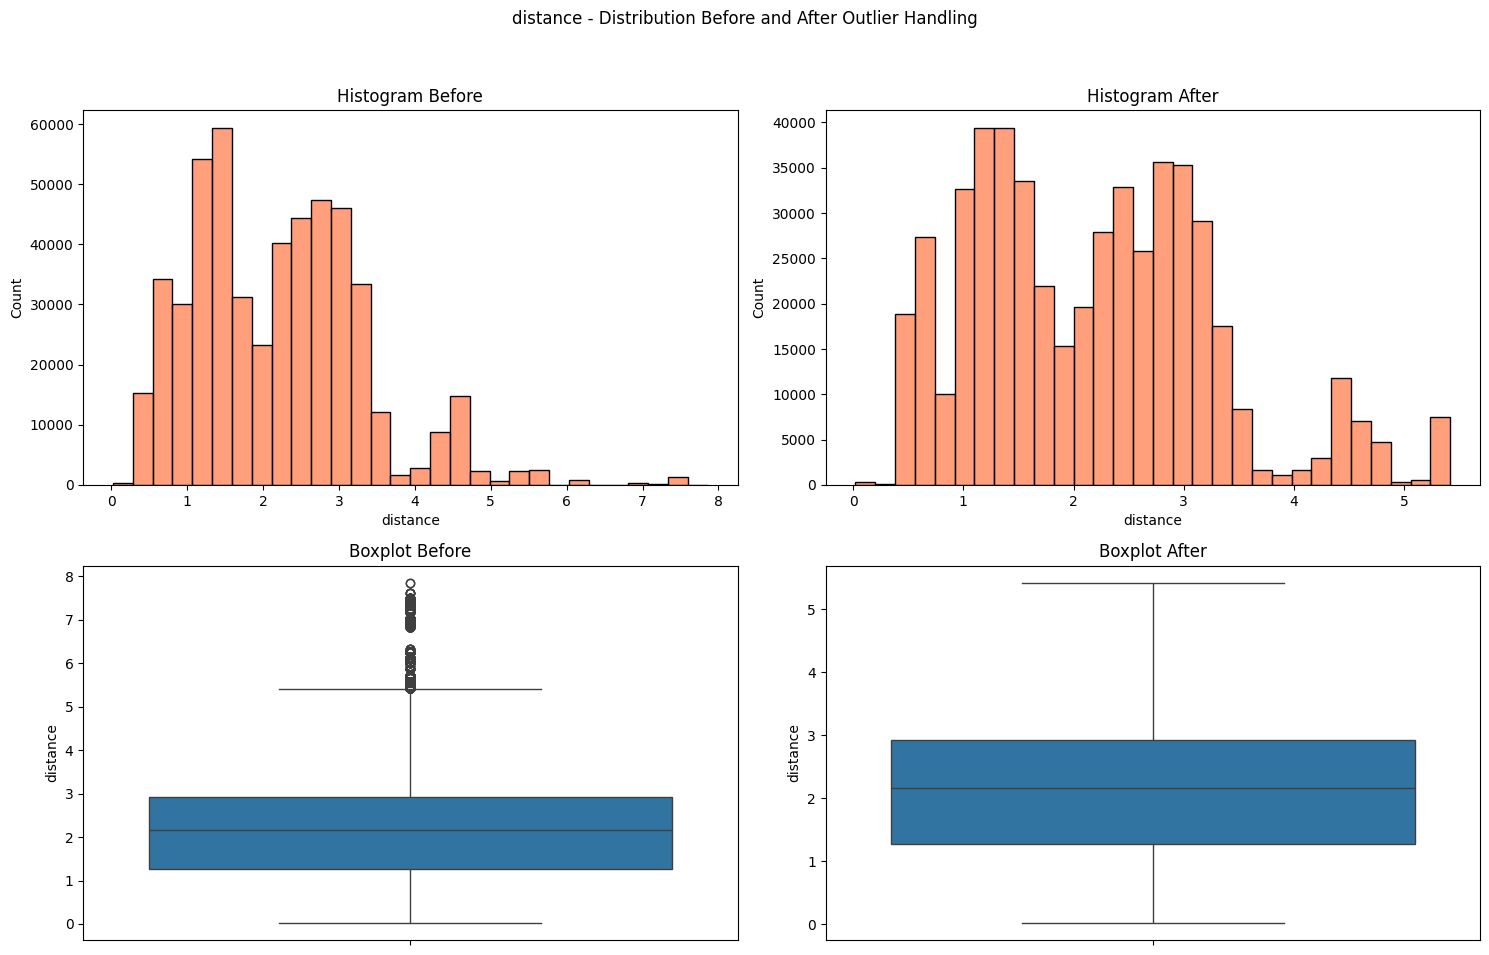

In [117]:
# Menampilkan visualisasi
outlier_handling_plot_comparison(X_train, X_train_capped, column_skewed[0])

fitur distance memiliki skewness yang tergolong rendah dan data tidak terdistribusi dengan normal. Penanganan outlier pada fitur ini akan menggunakan metode iqr, karena skew yang dimiliki rendah maka di pilih nilai fold sebesar 1,5.

## Scaling and Encoding

In [118]:
# Selecting numerical and categorical columns
num_columns = X_train_capped.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_columns = X_train_capped.select_dtypes(include=['object', 'category']).columns.tolist()

print('Categorical Columns: ', cat_columns)
print('Numerical Columns: ', num_columns)

Categorical Columns:  ['name', 'cab_type', 'destination', 'source']
Numerical Columns:  ['distance', 'surge_multiplier']


In [119]:
# Splitting the train and test features into categorical and numerical columns
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

### Scaling

- Dikarenakan fitur `distance` dan `surge_multiplier` memiliki rentang nilai yang berbeda maka kedua fitur ini akan dilakukan scaling. 
- Distribusi data pada kedua fitur numerical tidak normal serta outlier pada salah satu fitur di abaikan maka metode scaling yang akan digunakan RobustScaler dimana metode ini digunakan ketika fitur tidak terdistribusi secara normal dan memiliki outlier.

In [120]:
# Define scaler
scaler = RobustScaler()

#Fit_transform for X_train, transform for X_test
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[ 0.60240964,  0.        ],
       [-0.12650602,  0.        ],
       [-1.02409639,  0.        ],
       ...,
       [-0.42168675,  0.        ],
       [-0.90963855,  0.        ],
       [ 1.31325301,  0.        ]])

### Encoding 

Encoding dilakukan pada fitur categorical agar fitur dapat dibaca oleh model machine learning. Fitur categorical yang ada tidak ada fitur yang menandakan hierarchy value maka seluruh fitur akan diencoding mengunakan metode One Hot Encoding.

In [121]:
# menampilkan fitur kategori
X_train_cat.head()

,name,cab_type,destination,source
267570,Lyft XL,Lyft,Fenway,North Station
88148,Lux Black,Lyft,Back Bay,Haymarket Square
173246,Lux,Lyft,South Station,Financial District
520620,WAV,Uber,North Station,Boston University
524192,Lyft XL,Lyft,Haymarket Square,Theatre District


In [122]:
# Initialize the OrdinalEncoder with handle_unknown='ignore'
encoder = OneHotEncoder(sparse_output=False)

#Fit_transform for X_train, transform for X_test
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [123]:
# mengeluarkan nama kolom pada hasil encoding
cat_name_columns=encoder.get_feature_names_out()

## Penggabungan data

In [124]:
# Menggabungkan hasil scaling dan encoding
X_train_final = np.concatenate([X_train_cat_encoded, X_train_num_scaled], axis=1)
X_test_final = np.concatenate([X_test_cat_encoded, X_test_num_scaled], axis=1)

# Get the column names
column_names =  list(encoder.get_feature_names_out()) + list(X_train_num.columns)

# Create DataFrames with column names
X_train_final_df = pd.DataFrame(X_train_final, columns=column_names)
X_test_final_df = pd.DataFrame(X_test_final, columns=column_names)

In [125]:
# Menampilkan data train
X_train_final_df.head()

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,...,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,distance,surge_multiplier
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.602410,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.126506,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.024096,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.740964,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.271084,0.0


In [126]:
# Menampilkan data test
X_test_final_df.head()

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,...,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,distance,surge_multiplier
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.246988,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.584337,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.367470,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162651,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.451807,0.0


## Multicollinearity 

Pada tahapan ini fitur akan dilihat multicollinearitynya dengan cara VIF (variance inflation factor), nilai ini dicari untuk pemahaman lebih dalam terhadap korelasi antar fitur fitur independent. Nilai ini juga menjadi salah satu pertimbangan pemilihan Regularization yang sesuai kondisi pada data. Nilai ini tidak digunakan sebagai salah satu pertimbangan fitur selection yang digunakan pada model.

In [127]:
# Mencari nilai VIF pada fitur
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [128]:
# Menampilkan nilai vif pada fitur
calc_vif(X_train_final_df)

,variables,VIF
0,name_Black,1.032936e+13
1,name_Black SUV,8.325969e+10
2,name_Lux,1.414292e+11
3,name_Lux Black,5.621735e+10
4,name_Lux Black XL,1.240132e+11
5,name_Lyft,9.685160e+13
6,name_Lyft XL,2.908849e+09
7,name_Shared,6.227641e+09
8,name_UberPool,2.474400e+09
9,name_UberX,8.392672e+08


Selain fitur `distance` dan `surge_multiplier` nilai VIF sangat tinggi melebihi 10, yang berarti korelasi antara fitur selain distance dan surge_multiplier sangat tinggi, akan tetapi berdasarkan domain knowledge yang dijelaskan sebelumnya fitur fitur tersebut berpengaruh terhadap price maka tidak ada fitur yang akan di buang.

# VI Model Definition

- Model yang akan dipilih ada dua yaitu Linear Regression dan Ridge Regression
- Ridge Regression dipilih karena fitur memiliki multicollinear yang tinggi, dimana model ini baik digunakan ketika data memiliki multicollinear yang tinggi tetapi ingin tetap mempertahankan fitur yang ada dan fitur memiliki outlier.
- Hyperparameter yang digunakan adalah alpha `α`. Alpha digunakan untuk mengontrol regularisasi dimana meningkatkan penalti pada besaran koefisien, sehingga menghasilkan model dengan koefisien lebih kecil yang bisa mengurangi overfitting.


In [129]:
# Model Linear Regression
model_lin_reg = LinearRegression()

In [130]:
# Ridge Regression dengan alpha 1
model_ridge_alpha_1 = Ridge(alpha=1.0)

In [131]:
# Ridge Regression dengan alpha 100
model_ridge_alpha_100 = Ridge(alpha=100)

# VII Model Training

Pada tahapan ini model akan di fitting pada data train

In [132]:
# Fitting Linear Regression
model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

In [133]:
# Fitting Ridge Regression alpha 1
model_ridge_alpha_1.fit(X_train_final, y_train)

Ridge()

In [134]:
# Fitting Ridge Regression alpha 100
model_ridge_alpha_100.fit(X_train_final, y_train)

Ridge(alpha=100)

# VIII Model Evaluation

Metrik evaluation yang digunakan Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R2 Score digunakan untuk memprediksi harga (price) Uber dan Lyft karena memberikan gambaran menyeluruh tentang kinerja model. MSE dan RMSE mengukur rata-rata kesalahan prediksi, membantu memahami seberapa jauh prediksi dari nilai aktual. RMSE khususnya mudah diinterpretasikan karena berada dalam satuan yang sama dengan variabel target. R2 Score menunjukkan seberapa baik model menjelaskan variabilitas harga. Konsistensi metrik ini antara data train dan test memastikan model tidak overfit dan memiliki kemampuan generalisasi yang baik, menjadikannya andal untuk prediksi harga layanan tersebut.

In [135]:
# Membuat dict metrik evaluasi
eval_results = {
    'name': [],
    'MSE - Train': [],
    'MSE - Test': [],
    'RMSE - Train': [],
    'RMSE - Test': [],
    'R2 Score - Train': [],
    'R2 Score - Test': []
}

def model_evaluation(name, model, X_train, X_test, y_train, y_test):
  # Predict Train-Set and Test-Set
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  # Model evaluation using different metrics
  mse_train = mean_squared_error(y_train, y_pred_train)
  mse_test = mean_squared_error(y_test, y_pred_test)

  rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
  rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

  r2score_train = r2_score(y_train, y_pred_train)
  r2score_test = r2_score(y_test, y_pred_test)

  # Save into dictionary
  eval_results['name'].append(name)
  eval_results['MSE - Train'].append(round(mse_train, 5))
  eval_results['MSE - Test'].append(round(mse_test, 5))
  eval_results['RMSE - Train'].append(round(rmse_train, 5))
  eval_results['RMSE - Test'].append(round(rmse_test, 5))
  eval_results['R2 Score - Train'].append(round(r2score_train, 5))
  eval_results['R2 Score - Test'].append(round(r2score_test, 5))

In [136]:
# evaluasi model Linear Regression
model_evaluation('Linear Regression', model_lin_reg, X_train_final, X_test_final, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


name,Linear Regression
MSE - Train,6.15991
MSE - Test,6.08505
RMSE - Train,2.48192
RMSE - Test,2.46679
R2 Score - Train,0.92926
R2 Score - Test,0.92959


In [137]:
# Evaluasi model Ridge Regression
model_evaluation('Ridge with alpha=1', model_ridge_alpha_1, X_train_final, X_test_final, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


name,Linear Regression,Ridge with alpha=1
MSE - Train,6.15991,6.15989
MSE - Test,6.08505,6.08489
RMSE - Train,2.48192,2.48191
RMSE - Test,2.46679,2.46676
R2 Score - Train,0.92926,0.92926
R2 Score - Test,0.92959,0.92959


In [138]:
# Evaluasi model Ridge Regression
model_evaluation('Ridge with alpha=100', model_ridge_alpha_100, X_train_final, X_test_final, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


name,Linear Regression,Ridge with alpha=1,Ridge with alpha=100
MSE - Train,6.15991,6.15989,6.16165
MSE - Test,6.08505,6.08489,6.08482
RMSE - Train,2.48192,2.48191,2.48227
RMSE - Test,2.46679,2.46676,2.46674
R2 Score - Train,0.92926,0.92926,0.92924
R2 Score - Test,0.92959,0.92959,0.92959


- Linear Regression dan Ridge Regression (dengan kedua nilai alpha) menunjukkan nilai MSE, RMSE, dan R2 yang hampir identik baik pada data train maupun test. Ini menunjukkan bahwa semua model memiliki good fit.
- MSE dan RMSE untuk data train dan test menunjukkan perbedaan yang sangat kecil antara model, dengan nilai MSE sekitar 6.16 dan RMSE sekitar 2.48 untuk data train, serta MSE sekitar 6.08 dan RMSE sekitar 2.47 untuk data test. Ini menandakan bahwa baik Linear Regression maupun Ridge Regression memberikan prediksi harga yang akurat dan konsisten.
- R2 Score sangat tinggi (sekitar 0.93) untuk semua model pada data train dan test, menunjukkan bahwa model dapat menjelaskan sekitar 93% variabilitas dalam harga perjalanan. Ini menandakan bahwa semua model memiliki kecocokan yang sangat baik dengan data.

In [139]:
# Compare the coefficients

print('Linear Regression')
print('Coefficients : ', model_lin_reg.coef_)
print('Intercept    : ', model_lin_reg.intercept_)
print('')

print('Ridge Regression - alpha=1.0')
print('Coefficients : ', model_ridge_alpha_1.coef_)
print('Intercept    : ', model_ridge_alpha_1.intercept_)
print('')

print('Ridge Regression - alpha=100.0')
print('Coefficients : ', model_ridge_alpha_100.coef_)
print('Intercept    : ', model_ridge_alpha_100.intercept_)
print('')


Linear Regression
Coefficients :  [-3.85372421e+09 -3.85372420e+09  5.08999336e+09  5.08999337e+09
  5.08999338e+09  5.08999335e+09  5.08999336e+09  5.08999335e+09
 -3.85372423e+09 -3.85372422e+09 -3.85372422e+09 -3.85372422e+09
 -7.43807940e+11 -7.34864222e+11  5.76993592e+09  5.76993592e+09
 -6.72099200e+09 -6.72099200e+09  5.76993592e+09 -6.72099200e+09
 -6.72099200e+09  5.76993592e+09 -6.72099200e+09 -6.72099200e+09
  5.76993592e+09  5.76993592e+09  4.81771700e+10  4.81771700e+10
  3.56862420e+10  3.56862420e+10  4.81771700e+10  3.56862420e+10
  3.56862420e+10  4.81771700e+10  3.56862420e+10  3.56862420e+10
  4.81771700e+10  4.81771700e+10  5.02397725e+00  1.84862387e+01]
Intercept    :  697261768574.4681

Ridge Regression - alpha=1.0
Coefficients :  [  4.65944758  14.42780683   0.37484486   5.67460941  14.92938555
  -7.790629    -2.1081827  -10.67509177  -7.11345364  -6.09883012
  -0.18267247  -6.09723465   0.40493679  -0.40493679  -0.05840533
  -0.38842911  -0.14160669  -0.457757

Linear Regression:
- Koefisien yang sangat besar dan bervariasi menunjukkan bahwa model Linear Regression mengalami kesulitan dalam menstabilkan pengaruh masing-masing fitur, terutama karena beberapa koefisien memiliki nilai yang sangat besar atau sangat kecil. Ini bisa menunjukkan potensi masalah multikolinearitas atau sensitivitas tinggi terhadap data.
- Intercept yang sangat besar (697261768574.4681) juga menunjukkan adanya ketidakseimbangan dalam model, yang dapat disebabkan oleh skala data atau masalah numerik lainnya.

Ridge Regression (alpha=1 dan alpha=100):
- Koefisien dalam model Ridge Regression lebih terkontrol dan konsisten dibandingkan dengan Linear Regression. Penggunaan regularisasi membantu mengurangi variasi ekstrim pada koefisien, yang membuat model lebih stabil dan generalisasi lebih baik.
- Intercept pada Ridge Regression (sekitar 16.23) jauh lebih masuk akal dan menunjukkan bahwa model mampu menangani skala data dengan lebih baik.
- Dengan peningkatan nilai alpha, perbedaan koefisien relatif kecil, menunjukkan bahwa model Ridge Regression dengan berbagai tingkat regularisasi tetap stabil dan performanya mirip.
- Dengan perbedan nilai coeficients dan infecept yang tidak signifikan maka model yang diplih adalah model `Ridge Regression alpha=1`. 

# IX Model Saving

In [140]:
#Save the Files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('model_ridge_reg.pkl', 'wb') as file_5:
  pickle.dump(model_ridge_alpha_1, file_5)

# X Model Inference

Pada tahapan ini model yang dipilih akan diuji dengan data yang belum dilihat sebelumnya pengambilan data sudah dipersiapkan sebelum data di split. Terdapat 15 baris, data yang akan digunakan hanya 10 data untuk melakukan uji coba model terhadap data 

In [149]:
# Menampilkan data inference

inference = inference_data.iloc[5:].reset_index(drop=True)
inference

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,66fe821e-a6f4-4f76-9e13-ec9976d74715,1.543761e+09,14,2,12,2018-12-02 14:33:03,America/New_York,Financial District,Northeastern University,Uber,...,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
1,cd8f780b-0eb9-4756-8fc6-96d5540d2c7b,1.544935e+09,4,16,12,2018-12-16 04:40:09,America/New_York,Haymarket Square,North Station,Uber,...,0.0082,1544893200,39.74,1544929200,54.29,1544896800,37.04,1544929200,53.62,1544896800
2,92f3057e-3124-43bc-a94f-766726e675ac,1.543248e+09,15,26,11,2018-11-26 15:56:09,America/New_York,Boston University,Financial District,Lyft,...,0.1234,1543251600,40.74,1543233600,46.27,1543255200,37.46,1543291200,43.78,1543244400
3,78ed2549-2db8-4755-8149-40f39c69f433,1.543350e+09,20,27,11,2018-11-27 20:18:22,America/New_York,Financial District,North End,Lyft,...,0.1430,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000
4,6203c75a-308f-49b3-b8db-a4c3d860fff1,1.543360e+09,23,27,11,2018-11-27 23:00:22,America/New_York,South Station,Financial District,Lyft,...,0.1438,1543338000,36.37,1543377600,46.74,1543320000,32.60,1543377600,43.93,1543320000
5,344a6d49-f1c8-4f96-bdf6-d001fe9a9913,1.543405e+09,11,28,11,2018-11-28 11:41:23,America/New_York,North Station,North End,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
6,f84b4eab-bee7-43f7-8b4b-c2a32accb59c,1.543851e+09,15,3,12,2018-12-03 15:22:56,America/New_York,Theatre District,Boston University,Uber,...,0.0004,1543852800,42.91,1543896000,57.04,1543852800,39.59,1543896000,56.37,1543852800
7,683a71e6-78c0-41da-a38b-550c50609511,1.543649e+09,7,1,12,2018-12-01 07:28:06,America/New_York,South Station,Back Bay,Lyft,...,0.0000,1543683600,31.55,1543658400,44.72,1543690800,27.95,1543658400,44.05,1543690800
8,a39f380d-7b5e-493e-8b96-b4be2043f954,1.543869e+09,20,3,12,2018-12-03 20:27:57,America/New_York,North Station,North End,Uber,...,0.0004,1543852800,42.83,1543896000,57.52,1543852800,39.65,1543896000,56.85,1543852800
9,ab229d35-b058-4afe-9514-671bd272024d,1.543541e+09,1,30,11,2018-11-30 01:23:04,America/New_York,West End,Fenway,Lyft,...,0.0000,1543510800,35.20,1543550400,44.96,1543510800,31.40,1543550400,38.85,1543510800


## Inference Feature Engineering

In [150]:
# Mempersiapkan data inference 
inference_num = inference[num_columns]
inference_cat = inference[cat_columns]


inference_num_scaled = scaler.transform(inference_num)


inference_cat_encoded = encoder.transform(inference_cat)

inference_final = np.concatenate([inference_cat_encoded,inference_num_scaled],axis=1)

column_names =  list(encoder.get_feature_names_out()) + list(inference_num.columns)


inference_df = pd.DataFrame(inference_final, columns=column_names)

In [151]:
# Menampilkan data setelah di encoding dan scaling
inference_df.head()

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,...,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,distance,surge_multiplier
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.427711,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.006024,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.337349,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.680723,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.921687,0.0


## Inference Prediction

In [152]:
# Ridge Regression Prediction
y_pred_inf_ridge_1 = model_ridge_alpha_1.predict(inference_final)

In [153]:
# Membandingkan hasil prediksi dengan data aktual
y_pred_inf_ridge_1_df = pd.DataFrame(y_pred_inf_ridge_1, columns=['Price Prediction Ridge Alpha 1'])
pred_inf = pd.concat([inference['price'],y_pred_inf_ridge_1_df], axis=1)
pred_inf

,price,Price Prediction Ridge Alpha 1
0,10.0,11.223867
1,7.5,5.238772
2,22.5,21.100331
3,10.5,14.006453
4,9.0,10.360412
5,12.5,11.840395
6,9.5,11.343763
7,10.5,12.358144
8,8.5,9.616522
9,16.5,16.325491


Prediksi harga oleh model Ridge Regression cukup mendekati harga aktual. Sebagai contoh, prediksi harga untuk kolom terakir adalah 16.3 dibandingkan dengan harga aktual 16.32, menunjukkan residual yang kecil.

In [154]:
# menghitung residual model pada data inference
y_test_residuals = pred_inf['price'] - pred_inf['Price Prediction Ridge Alpha 1'] 
y_test_residuals

0   -1.223867
1    2.261228
2    1.399669
3   -3.506453
4   -1.360412
5    0.659605
6   -1.843763
7   -1.858144
8   -1.116522
9    0.174509
dtype: float64

Residual berkisar dari -3.51 hingga 2.26. Sebagian besar residual relatif kecil, menunjukkan bahwa prediksi model cukup akurat. Namun, beberapa residual yang lebih besar, seperti -3.51, menunjukkan adanya kesalahan prediksi yang signifikan pada beberapa kasus.


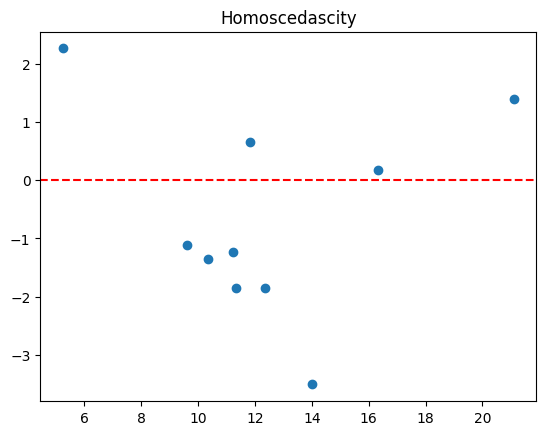

In [155]:
#plot homoscadascity
plt.title('Homoscedascity')
plt.scatter(pred_inf['Price Prediction Ridge Alpha 1'], y_test_residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

Tidak ada pola yang jelas pada residual, menunjukkan bahwa kesalahan prediksi tersebar secara acak. Keacakan ini mendukung asumsi homoskedastisitas, yang berarti bahwa varians residual konstan pada semua tingkat variabel independen.

# XI Kesimpulan

- Pola penggunaan layanan ridesharing Uber dan Lyft di New York selama dua bulan menunjukkan tren yang jelas terkait waktu, tanggal, dan kondisi cuaca. Pemesanan tertinggi terjadi antara pukul 23:00 hingga 01:00, dengan jam paling sepi antara pukul 05:00 hingga 08:00, serta jumlah pemesanan paling sedikit pada tanggal 9 dan 10 setiap bulan. Mayoritas pengguna cenderung memilih layanan reguler seperti 'UberX' dan 'Lyft' daripada layanan premium. Cuaca mendung dan berawan meningkatkan jumlah perjalanan, sementara kondisi buruk seperti hujan dan gerimis mengurangi jumlahnya. Selain itu, lokasi-lokasi seperti Haymarket Square dan North Station sering menjadi sumber dan tujuan perjalanan terbanyak. Insight ini mengindikasikan preferensi waktu, jenis layanan, kondisi cuaca, dan lokasi yang mempengaruhi penggunaan layanan ridesharing di New York.

- Model Linear Regression dan Ridge Regression (dengan alpha=1 dan alpha=100) semuanya memberikan kinerja yang sangat baik dan hampir identik dalam memprediksi harga Uber dan Lyft. Regularisasi Ridge tidak memberikan peningkatan yang signifikan. Nilai R² yang tinggi dan konsistensi metrik evaluasi antara data train dan test menunjukkan bahwa model memiliki kemampuan prediksi yang kuat dan tidak mengalami overfitting.

- Penggunaan Ridge Regression dengan regularisasi (alpha=1 dan alpha=100) memberikan stabilitas yang lebih baik pada koefisien dibandingkan dengan Linear Regression, yang terlihat dari nilai koefisien yang lebih masuk akal dan konsisten. Metrik evaluasi menunjukkan bahwa semua model memiliki kinerja yang sangat baik, tetapi Ridge Regression menawarkan keunggulan dalam hal stabilitas dan pengendalian multikolinearitas, menjadikannya pilihan yang lebih tepat untuk prediksi harga layanan Uber dan Lyft.

- Model Ridge Regression dengan alpha=1 menunjukkan akurasi prediksi yang cukup baik pada data inferensi, dengan sebagian besar prediksi mendekati nilai aktual dan beberapa kesalahan yang signifikan. Model ini efektif dalam menyeimbangkan antara fitting data training dan generalisasi ke data baru, yang terlihat dari residual yang kecil dan tersebar secara acak. Namun, beberapa residual besar menunjukkan bahwa masih ada ruang untuk perbaikan, mungkin melalui penyetelan lebih lanjut dari model atau dengan memasukkan data training yang lebih beragam untuk menangkap variabilitas dalam data dengan lebih baik. Secara keseluruhan, Ridge Regression memberikan pendekatan yang andal untuk memprediksi harga perjalanan sembari mengontrol overfitting dan multikolinearitas.

- Model ini membantu dalam perencanaan armada dengan memprediksi jumlah pengemudi yang diperlukan pada berbagai waktu dan kondisi cuaca, sehingga meningkatkan efisiensi operasional dan mengurangi waktu tunggu bagi pelanggan. Dengan analisis preferensi pengguna, perusahaan dapat menyesuaikan penawaran layanan seperti layanan reguler atau premium untuk lebih efektif memenuhi kebutuhan pasar. Selain itu, model juga dapat membantu dalam menentukan lokasi optimal untuk penempatan pengemudi atau penawaran promosi berdasarkan pola perjalanan pengguna.

- Kekurangan pada model ini adalah perlunya penanganan multikolinearitas yang baik dengan menggunakan metode yang lain seperti PCA untuk meminimalisir terjadinya multikolinearitas. Pemilihan nilai hyperparameter yang tepat dengan menggunakan metode teknik Grid Search atau Random Search untuk mengetahui nilai alpha yang tepat sehingga model ridge regression dapat bekerja dengan lebih efficient. Menggunakan teknik cross-validation yang lebih kuat seperti k-fold cross-validation dapat memberikan estimasi yang lebih akurat terhadap performa model dan membantu dalam mencegah overfitting.

# Conceptual Problems

## 1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression ! (Gunakan bahasa anda sendiri)

Ada 5 asumsi pada linear regression asumsi ini berguna untuk mengvalidasi apakah data cocok untuk dipakai pada model linear regression.

- Asumsi 1 : Adanya hubungan linear
adanya hubungan linear pada variable independent dan variable dependent atau target, jika tidak ada hubungan linear maka model akan cenderung gagal dalam memprediksi. cara mengetahuinya adanya hubungan linear menggunakan scatterplot.

- Asumsi 2 : Hanya sedikit atau tidak ada multikolineariti.
hubungan antar fitur tidak boleh atau sedikit ada korelasi, karena akan membawa fitur membawa keterangan yang sama sehingga model kesulitan membedakan. cara mengetahuinya dengan menggunakan VIF. jika nilai VIF fitur lebih dari 10 maka dapat dikatakan data memiliki multikolineariti.
cara mengatasi fitur yang memiliki nilai vif yang tinggi menseleksi fitur yang nilai vifnya lebih dari 10 atau menggunakan domain knowlage, jika ingin mempertahankan fitur bisa di atasi dengan regularization atau menggunakan PCA.

- Asumsi 3 : Multivariate Normality
ketika model sudah selesai dibuat, hasil dari model dapat di observasi dengan cara mencari selisih dari target aktual dan target result. cara mengetahuinya dengan menggunakan QQ plot.

- Asumsi 4 : No Auto - Correlation
ketika mengerjakan data yang ada time series residual model tidak boleh meninggkat terus menerus, no auto-correlation berarti residual harus independent. cara ceknya dapat menggunakan Durbin-Watson.

- Asumsi 5 : Homoscedasticity
homoscedasticity berarti model mengghasilkan error yang constant jika model menghasilkan error yang tidak constant atau heteroscedasticty berarti model meiliki banyak outliers atau extreme value.



## 2. Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun !

In [156]:
print('Ridge Regression - alpha=1.0')
print('Coefficients : ', model_ridge_alpha_1.coef_)
print('Intercept    : ', model_ridge_alpha_1.intercept_)
print('')

Ridge Regression - alpha=1.0
Coefficients :  [  4.65944758  14.42780683   0.37484486   5.67460941  14.92938555
  -7.790629    -2.1081827  -10.67509177  -7.11345364  -6.09883012
  -0.18267247  -6.09723465   0.40493679  -0.40493679  -0.05840533
  -0.38842911  -0.14160669  -0.45775703   0.31180874   0.28268049
   0.11804396   0.11296621   0.06493785   0.05860211   0.20631051
  -0.10915166  -0.07668951  -0.47022681  -0.45229017  -0.2254866
   0.30322135   0.45686186   0.55595623  -0.10200586  -0.41697083
   0.15702891   0.37005834  -0.0994568    5.0239291   18.48204984]
Intercept    :  16.225309454222877



- Slope (Coefficients) menjunjukan pengaruh variable independent dengan variable dependent.
- intercept adalah titik dimana garis regressi memotong sumbu y
- Dalam regresi linear, koefisien yang sangat besar menunjukkan adanya overfitting atau masalah dengan skala data, dan nilai intercept yang sangat besar juga mengindikasikan masalah serupa. Sebaliknya, Ridge Regression menggunakan regularisasi (penalti) pada koefisien, menghasilkan koefisien yang lebih masuk akal dan stabil. Alpha yang lebih tinggi dalam Ridge Regression mengurangi besaran koefisien secara signifikan, yang membantu mengatasi overfitting dan multikolinearitas.